# Montar el Drive

In [0]:
#Montar mi google drive para poder usar los archivos
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!git clone https://github.com/mmngreco/IneqPy.git
%cd IneqPy
!pip install .

# Movernos al directorio donde estan los datos

In [0]:
%cd /content/gdrive/My Drive/Data/Indicadores/Gini
!ls

/content/gdrive/My Drive/Data/Indicadores/Gini
 Gini.ipynb  'GINI LIS LATAM.xlsx'   IneqPy


# Instalar módulo que contiene el Gini

In [0]:
import pandas as pd

DataProduccion = pd.read_excel('GINI LIS LATAM.xlsx', index_col=0)
DataProduccion

,BRAZIL,MEXICO,CHILE,ARGENTINA,COLOMBIA,CUBA,PERU,JAMAICA,URUGUAY,VENEZUELA,ECUADOR
Year,,,,,,,,,,,
1980',4,2,1,0,0,1,1,0,0,0,0
1981',6,1,2,2,1,0,1,2,0,0,0
1982',3,4,0,0,0,0,1,1,0,0,0
1983',5,1,3,1,0,0,0,0,0,1,0
1984',2,2,1,0,0,0,0,0,0,0,0
1985',5,0,0,0,0,1,0,1,0,0,0
1986',3,4,1,1,0,0,0,2,0,0,0
1987',1,1,0,0,0,0,0,0,0,0,0
1988',3,2,1,1,0,0,0,1,0,0,0


In [0]:
import pandas as pd
import numpy as np
import ineqpy
import plotly.graph_objects as go



years = DataProduccion.index
#Calcular Gini para cada año
G = {}
for year in years:
  G[year] = ineqpy.gini(income=DataProduccion.loc[year].to_numpy())

G

{"1980'": 0.7555555555555559,
 "1981'": 0.6400000000000002,
 "1982'": 0.8222222222222225,
 "1983'": 0.7818181818181822,
 "1984'": 0.8400000000000004,
 "1985'": 0.9142857142857145,
 "1986'": 0.7454545454545457,
 "1987'": 0.9000000000000002,
 "1988'": 0.7250000000000002,
 "1989'": 0.7250000000000002,
 "1990'": 0.9000000000000002,
 "1991'": 0.7333333333333337,
 "1992'": 0.5500000000000003,
 "1993'": 0.7833333333333337,
 "1994'": 0.6615384615384617,
 "1995'": 0.6500000000000004,
 "1996'": 0.8000000000000004,
 "1997'": 0.7777777777777781,
 "1998'": 0.8222222222222224,
 "1999'": 0.8235294117647063,
 "2000'": 0.6518518518518521,
 "2001'": 0.8736842105263162,
 "2002'": 0.7764705882352944,
 "2003'": 0.8476190476190479,
 "2004'": 0.786666666666667,
 "2005'": 0.67741935483871,
 "2006'": 0.756756756756757,
 "2007'": 0.629268292682927,
 "2008'": 0.8715231788079473,
 "2009'": 0.8638036809815955,
 "2010'": 0.7740740740740742,
 "2011'": 0.8226415094339626,
 "2012'": 0.7942028985507249,
 "2013'": 0.721

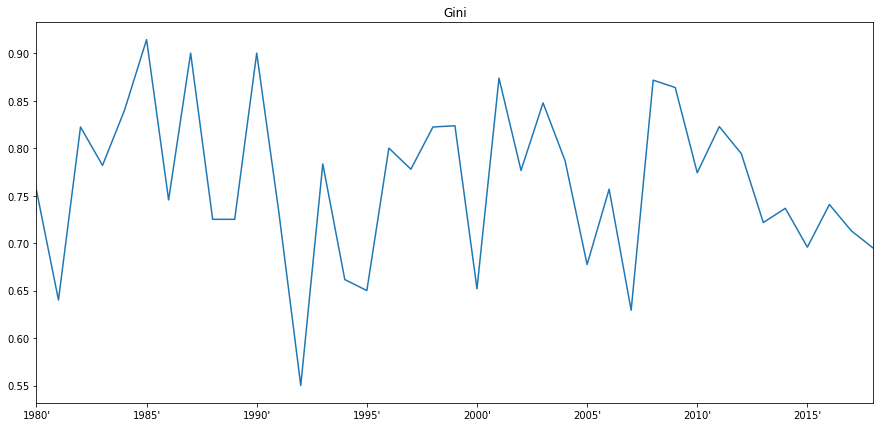

In [0]:
import matplotlib.pylab as plt

df = pd.DataFrame.from_dict(G, orient='index')
df.plot(figsize=(15,7), title='Gini', legend=False)
#plt.plot(df)
#plt.show()